<a href="https://colab.research.google.com/github/KelvinLam05/Marketing-Response/blob/main/Market_Response_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Abstract**  

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 


**Goal of the project**

The aim of this project will be to identify the customers most likely to respond when called, using only features known about the customers immediately prior to the campaign, to help the outbound sales team increase their call conversion rate.

**Data set information**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

**Attribute information**

Bank client data

* Age (numeric)

* Job : type of job (categorical : 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

* Marital : marital status (categorical : 'divorced', 'married', 'single', 'unknown' ; note : 'divorced' means divorced or widowed)

* Education : (categorical : 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

* Default : has credit in default? (categorical : 'no', 'yes', 'unknown')

* Housing : has housing loan? (categorical : 'no', 'yes', 'unknown')

* Loan : has personal loan? (categorical : 'no', 'yes', 'unknown')

**Related with the last contact of the current campaign**

* Contact : contact communication type (categorical : 'cellular', 'telephone')

* Month : last contact month of year (categorical : 'jan', 'feb', 'mar', ..., 'nov', 'dec')

* Day_of_week : last contact day of the week (categorical : 'mon', 'tue', 'wed', 'thu', 'fri')

* Duration : last contact duration, in seconds (numeric)

**Other attributes**

* Campaign : number of contacts performed during this campaign and for this client (numeric, includes last contact)

* Pdays : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

* Previous : number of contacts performed before this campaign and for this client (numeric)

* Poutcome : outcome of the previous marketing campaign (categorical : 'failure', 'nonexistent', 'success')

**Social and economic context attributes**

* Emp.var.rate : employment variation rate - quarterly indicator (numeric)

* Cons.price.idx : consumer price index - monthly indicator (numeric)

* Cons.conf.idx : consumer confidence index - monthly indicator (numeric)

* Euribor3m : euribor 3 month rate - daily indicator (numeric)

* Nr.employed : number of employees - quarterly indicator (numeric)

**Output variable (desired target)**

* y - has the client subscribed a term deposit? (binary : 'yes', 'no')

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Load the data
df = pd.read_csv('/content/bank-additional.csv', delimiter = ';')

In [ ]:
# Examine the data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
# Overview of all variables, their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

**Preprocessing**

In [ ]:
# Checking for missing values
df.isnull().sum().sort_values(ascending = False)

y                 0
day_of_week       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
age               0
dtype: int64

**Exploratory Data Analysis**

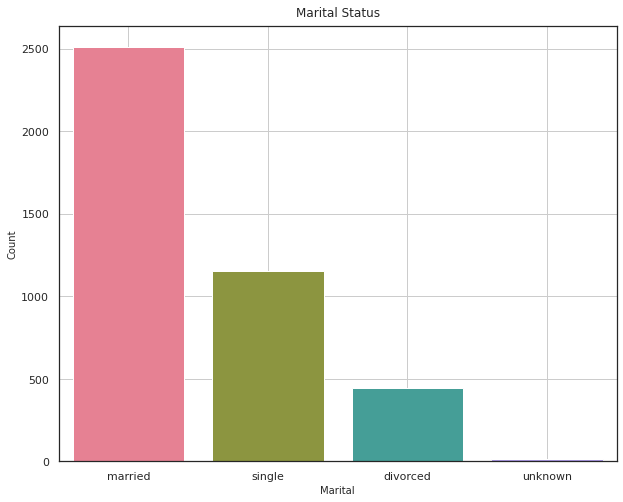

In [ ]:
# Plot
sns.set(style = 'ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x = 'marital', data = df, palette = 'husl')
ax.set_title('Marital Status', fontsize = 12, pad = 10)
ax.set_xlabel('Marital', fontsize = 10)
ax.set_ylabel('Count', fontsize = 10)
ax.tick_params(left = False, bottom = False)
plt.grid() 
plt.show()

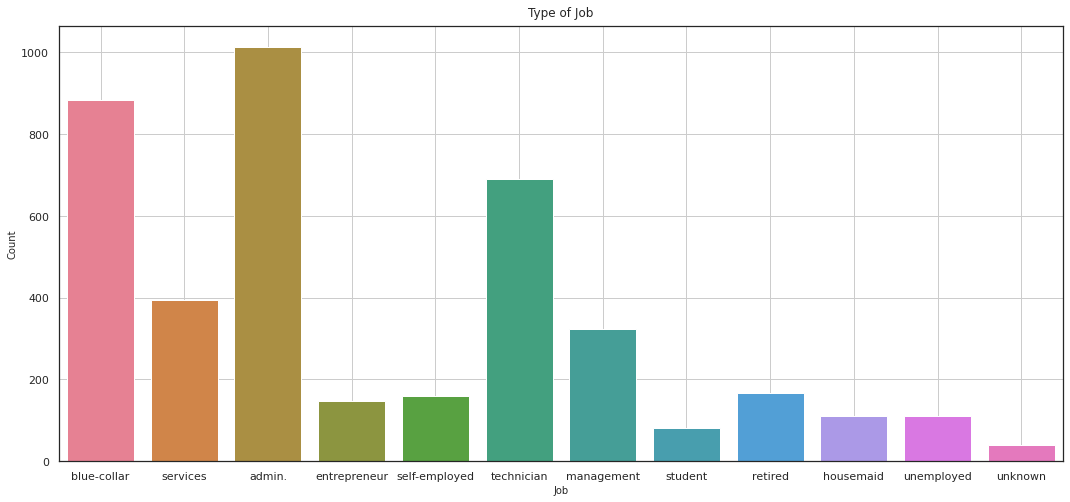

In [ ]:
# Plot
sns.set(style = 'ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18, 8)
sns.countplot(x = 'job', data = df, palette = 'husl')
ax.set_title('Type of Job', fontsize = 12, pad = 10)
ax.set_xlabel('Job', fontsize = 10)
ax.set_ylabel('Count', fontsize = 10)
ax.tick_params(left = False, bottom = False)
plt.grid() 
plt.show()

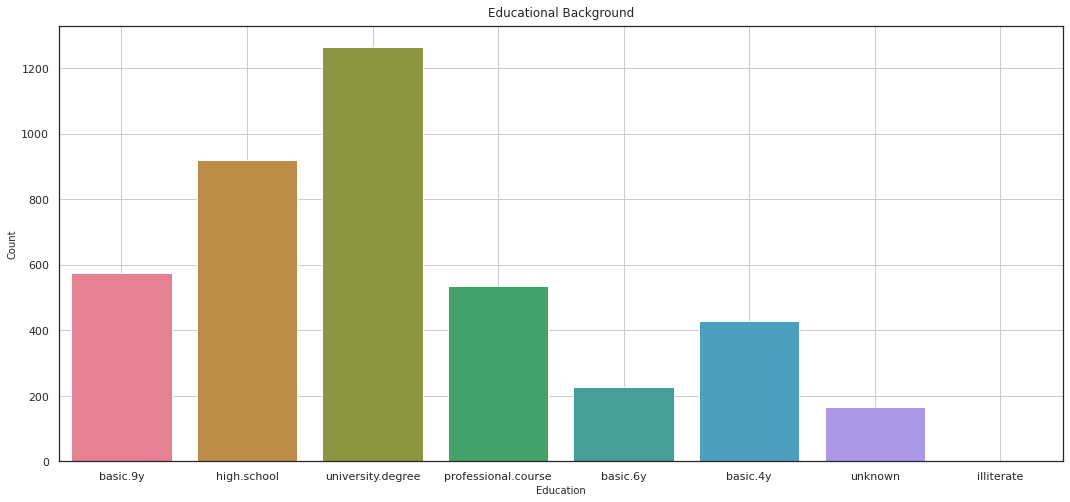

In [ ]:
# Plot
sns.set(style = 'ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18, 8)
sns.countplot(x = 'education', data = df, palette = 'husl')
ax.set_title('Educational Background', fontsize = 12, pad = 10)
ax.set_xlabel('Education', fontsize = 10)
ax.set_ylabel('Count', fontsize = 10)
ax.tick_params(left = False, bottom = False)
plt.grid() 
plt.show()

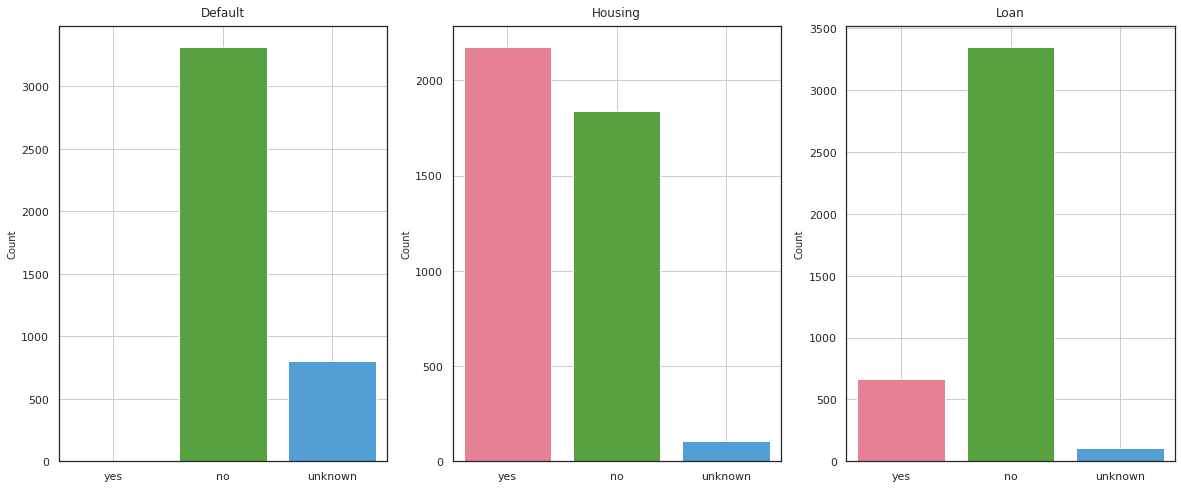

In [ ]:
# Plot
sns.set(style = 'ticks')
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 8))

sns.countplot(x = 'default', data = df, ax = ax1, order = ['yes', 'no', 'unknown'], palette = 'husl')
ax1.set_title('Default', fontsize = 12, pad = 10)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize = 10)
ax1.tick_params(left = False, bottom = False)
ax1.grid() 

sns.countplot(x = 'housing', data = df, ax = ax2, order = ['yes', 'no', 'unknown'], palette = 'husl')
ax2.set_title('Housing', fontsize = 12, pad = 10)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize = 10)
ax2.tick_params(left = False, bottom = False)
ax2.grid() 

sns.countplot(x = 'loan', data = df, ax = ax3, order = ['yes', 'no', 'unknown'], palette = 'husl')
ax3.set_title('Loan', fontsize = 12, pad = 10)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize = 10)
ax3.tick_params(left = False, bottom = False)
ax3.grid() 

**Feature engineering**

The contact, month, day_of_week, and duration fields contain data related to the current campaign, so can’t be used to target customers since they don’t exist until staff call them, so we’ll drop these.

In [ ]:
# Drop columns 
df = df.drop(columns = ['contact', 'month','day_of_week', 'duration', 'campaign'])

In [ ]:
# Examine the target parameter
df['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [ ]:
# Converting 'no' and 'yes' into 0 and 1 
df.replace({'no': 0, 'yes': 1}, inplace = True)

In [ ]:
df['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

The categorical features need to be converted to numeric values before they can be used within a model.

In [ ]:
# Select categorical columns 
categorical_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index

In [ ]:
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'poutcome'],
      dtype='object')

In [ ]:
# Dummy coding
df = pd.get_dummies(df, columns = categorical_cols)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4119 non-null   int64  
 1   pdays                          4119 non-null   int64  
 2   previous                       4119 non-null   int64  
 3   emp.var.rate                   4119 non-null   float64
 4   cons.price.idx                 4119 non-null   float64
 5   cons.conf.idx                  4119 non-null   float64
 6   euribor3m                      4119 non-null   float64
 7   nr.employed                    4119 non-null   float64
 8   y                              4119 non-null   int64  
 9   job_admin.                     4119 non-null   uint8  
 10  job_blue-collar                4119 non-null   uint8  
 11  job_entrepreneur               4119 non-null   uint8  
 12  job_housemaid                  4119 non-null   u

The table below demonstrates how to interpret the size (strength) of a correlation coefficient.

Size of Correlation         | Interpretation
----------------------------|------------------------------------------
.90 to 1.00 (-.90 to -1.00) | Very high positive (negative) correlation 
.70 to 0.90 (-.70 to -0.90) | High positive (negative) correlation
.50 to 0.70 (-.50 to -0.70) | Moderate positive (negative) correlation
.30 to 0.50 (-.30 to -0.50) | Low positive (negative) correlation
.00 to 0.30 (-.00 to -0.30) | Negligible correlation 

We will use the corr( ) function to examine the Pearson correlation coefficients between the numeric columns and the target variable y which tells us whether each customer converted or didn’t. The top features are previous and poutcome_success which related to previous campaign response, while pdays and nr.employed also have an impact.

In [ ]:
df.corr()[['y']].style.background_gradient(sns.light_palette('#2ecc71', as_cmap = True))

,y
age,0.060374
pdays,-0.332012
previous,0.255697
emp.var.rate,-0.283216
cons.price.idx,-0.098326
cons.conf.idx,0.054393
euribor3m,-0.298565
nr.employed,-0.349241
y,1.000000
job_admin.,0.040082


**Examine collinearity**

Including features that are highly correlated with each other, or are multicollinear, adds noise and inaccuracy, so we need to try and reduce this.

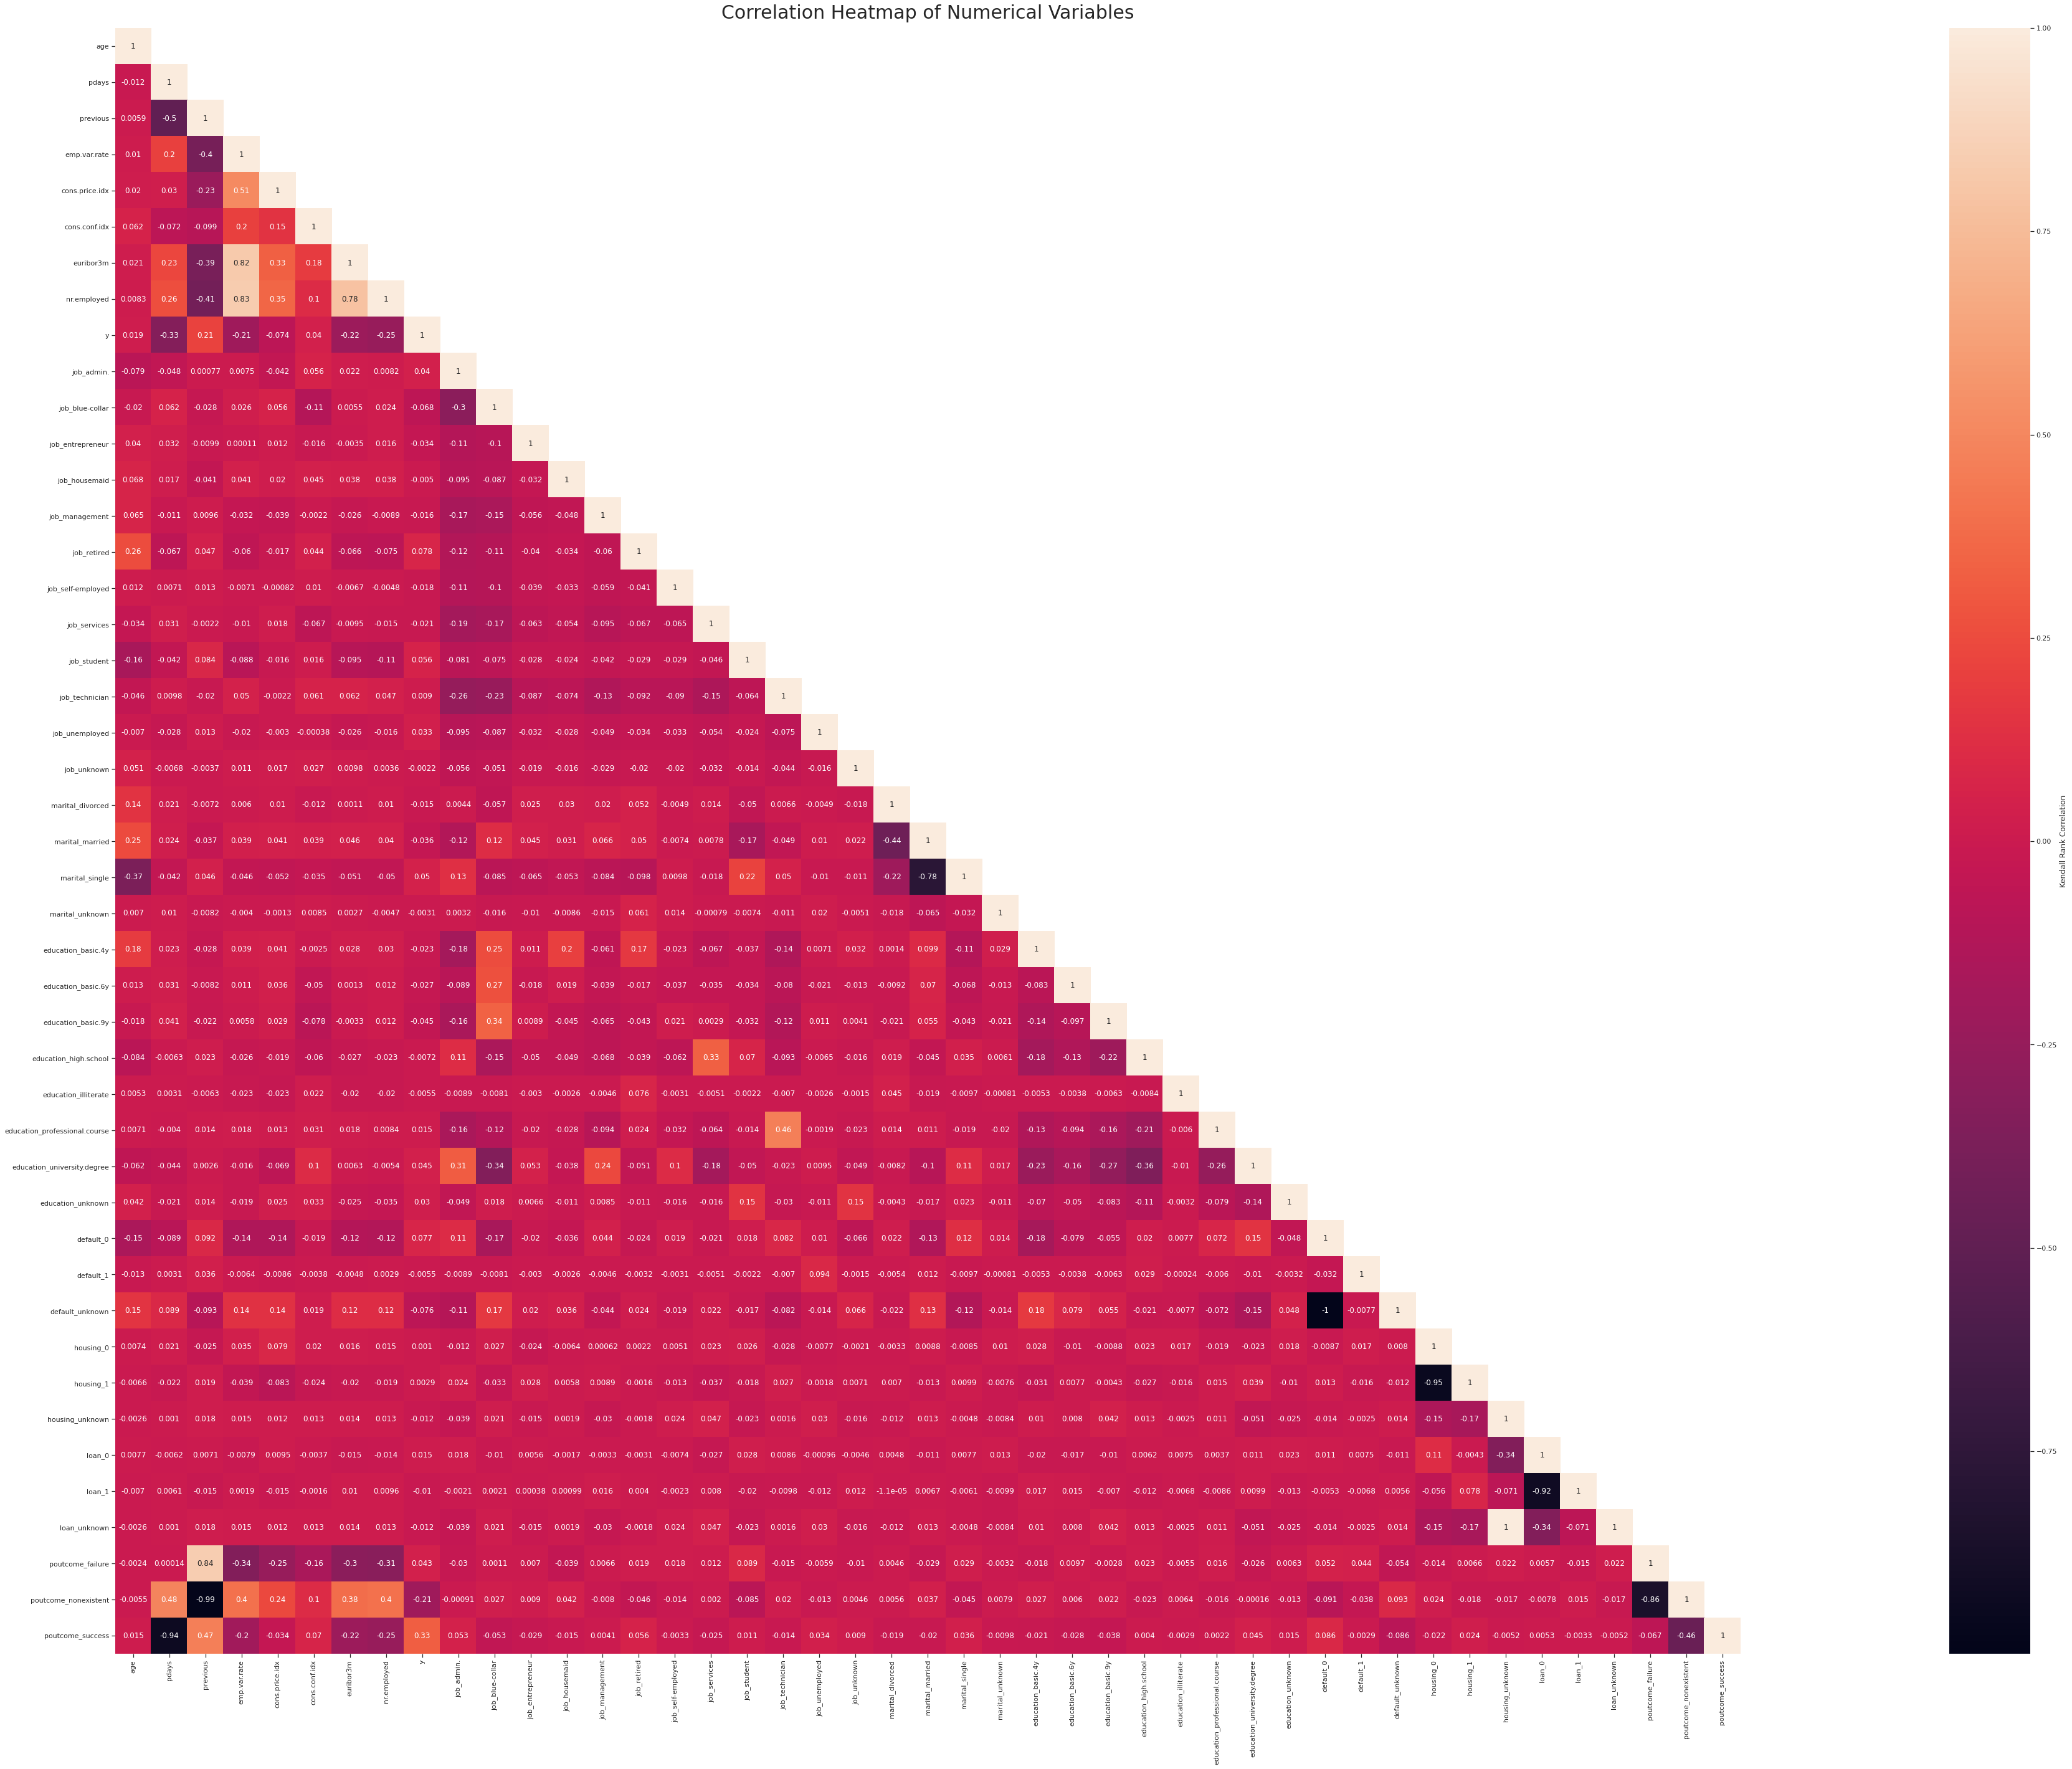

In [ ]:
# Using a non-parametric test of correlation (kendall), since some features are binary
cor_mat = df.corr(method = 'kendall')
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(120, 48)
heatmap = sns.heatmap(data = cor_mat, mask = mask,square = True, annot = True, cbar = True, cbar_kws = {'label': 'Kendall Rank Correlation'})
heatmap.set_title('Correlation Heatmap of Numerical Variables', fontdict = {'fontsize': 30}, pad = 15);

In [ ]:
# Select columns to plot
df_num = df.select_dtypes(include = ['float64', 'int64', 'uint8'])

# Drop dependent variable
df_num.drop(['y'], axis = 1, inplace = True)

# Set threshold value
thresh = 0.8

# Get correlation matrix
df_corr = df_num.corr().abs().unstack()

# Filter
df_corr_filt = df_corr[(df_corr > thresh) & (df_corr != 1) | (df_corr < -thresh) & (df_corr != -1)].reset_index()

# Reanming the DataFrame columns
df_corr_filt.rename(columns = {'level_0': 'Var1','level_1': 'Var2', 0: 'value'}, inplace = True)

# Deduplicate
df_corr_filt.iloc[df_corr_filt[['Var1', 'Var2']].apply(lambda r: ''.join(map(str, sorted(r))), axis = 1).drop_duplicates().index]

,Var1,Var2,value
0,pdays,poutcome_success,0.940565
1,previous,poutcome_nonexistent,0.854241
2,emp.var.rate,euribor3m,0.970308
3,emp.var.rate,nr.employed,0.897173
5,euribor3m,nr.employed,0.942589
8,default_0,default_unknown,0.999227
10,housing_0,housing_1,0.949959
12,loan_0,loan_1,0.915086
14,poutcome_failure,poutcome_nonexistent,0.855705


A general rule to follow to identify severe collinearity is:

If correlation is < -0.8 or > 0.8 between two variables or if a variable's Variance inflation factor (VIF) is greater than 20.

So these pairs of independent variables shouldn't be used together in any of our models because they have a correlation of < -0.8 or > 0.8 and can therefore cause multicollinearity.

In [ ]:
# Drop one of the feactures 
df.drop(['poutcome_success', 'poutcome_nonexistent', 'emp.var.rate', 'euribor3m', 'default_unknown', 'housing_0', 'loan_1'], axis = 1, inplace = True)

**Split the train and test data**

In [ ]:
X = df.drop('y', axis = 1) 

In [ ]:
y = df['y']

In [ ]:
X.shape, y.shape

((4119, 37), (4119,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Isolate X and y variables, and perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True, stratify = y)

**Define the model and bundle the pipeline**

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier 
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Make pipeline
pipeline = imbpipeline(steps = [
                                ('smote', SMOTE(random_state = 42)),
                                ('scaler', MinMaxScaler()),
                                ('model', XGBClassifier(random_state = 42)),
           ])

stratified_kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

In [ ]:
# Calling fit on the pipeline
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=42, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
          

**Generate predictions**

In [ ]:
# Make predictions
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

The XGBClassifier achieves an ROC/AUC of 60.17% on the test set.

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix

In [ ]:
# Confusion Matrix on train set
print('Confusion Matrix train data','\n', confusion_matrix(y_train, y_pred_train)) 
print('ROC/AUC on train data:', round(roc_auc_score(y_train, y_pred_train)*100, 2), '%', '\n')

# Confusion Matrix on test set
print('Confusion Matrix test data','\n',confusion_matrix(y_test, y_pred_test))
print('ROC/AUC on test data:', round(roc_auc_score(y_test, y_pred_test)*100, 2), '%', '\n')

Confusion Matrix train data 
 [[2858   76]
 [ 230  131]]
ROC/AUC on train data: 66.85 % 

Confusion Matrix test data 
 [[712  22]
 [ 69  21]]
ROC/AUC on test data: 60.17 % 



**Optimizing and tuning the pipeline**

In [ ]:
# Create the search grid
param_grid = dict(model__n_estimators = [50, 100, 150],
                  model__learning_rate = [0.001, 0.01],
                  model__max_depth = [5, 10],
                  model__min_child_weight = [1, 5, 10],
                  model__gamma =  [0.1, 1, 1.5],
                  model__subsample = [0.8, 0.9, 1.0],
                  model__colsample_bytree = [0.3, 0.5, 1.0],
                  model__scale_pos_weight = [1, 2, 4])

In [ ]:
# Create the model to be tuned
xgb_base = XGBClassifier(random_state = 42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_search = RandomizedSearchCV(estimator = pipeline, param_distributions = param_grid, scoring = 'roc_auc', cv = stratified_kfold, n_jobs = -1, random_state = 42)

In [ ]:
# Calling fit on the random search
random_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('smote',
                                              SMOTE(k_neighbors=5,
                                                    kind='deprecated',
                                                    m_neighbors='deprecated',
                                                    n_jobs=1,
                                                    out_step='deprecated',
                                                    random_state=42, ratio=None,
                                                    sampling_strategy='auto',
                                                    svm_estimator='deprecated')),
                                             ('scaler',
                                              MinMaxScaler(copy=True...
                   param_distributions={'model__colsa

In [ ]:
# View the best parameters from the random search
random_search.best_params_

{'model__colsample_bytree': 0.5,
 'model__gamma': 0.1,
 'model__learning_rate': 0.001,
 'model__max_depth': 10,
 'model__min_child_weight': 10,
 'model__n_estimators': 150,
 'model__scale_pos_weight': 2,
 'model__subsample': 1.0}

In [ ]:
# View the mean cross-validated score of the best model
cv_score = random_search.best_score_
test_score = random_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.7739459256219373
Test score: 0.7627232818649713


In [ ]:
# Store the best model in a variable to reference later
best_xgb = random_search.best_estimator_

In [ ]:
# Use the best parameters
pipeline = imbpipeline(steps = [
                                ('smote', SMOTE(random_state = 42)),
                                ('scaler', MinMaxScaler()),
                                ('model', XGBClassifier(colsample_bytree = 0.5, gamma = 0.1, learning_rate = 0.001, max_depth = 10, min_child_weight = 10, n_estimators = 150, scale_pos_weight = 2, subsample = 1, random_state = 42))
           ])

stratified_kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

In [ ]:
# Calling fit on the pipeline
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=42, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.5, gamma=0.1,
                               learning_rate=0.001, max_delta_step=0,
                               max_depth=10, min_child_weight=10, missing=None,
                               n_estimators=150, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=2,
  

**Generate predictions**

In [ ]:
# Make predictions
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

The XGBClassifier achieves an ROC/AUC of 70.07% on the test set.

In [ ]:
# Confusion Matrix on train set
print('Confusion Matrix train data','\n', confusion_matrix(y_train, y_pred_train)) 
print('ROC/AUC on train data:', round(roc_auc_score(y_train, y_pred_train)*100, 2), '%', '\n')

# Confusion Matrix on test set
print('Confusion Matrix test data','\n',confusion_matrix(y_test, y_pred_test))
print('ROC/AUC on test data:', round(roc_auc_score(y_test, y_pred_test)*100, 2), '%', '\n')

Confusion Matrix train data 
 [[2686  248]
 [ 156  205]]
ROC/AUC on train data: 74.17 % 

Confusion Matrix test data 
 [[678  56]
 [ 47  43]]
ROC/AUC on test data: 70.07 % 

